# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
%matplotlib inline
import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [4]:
websites.describe

<bound method NDFrame.describe of           URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0      M0_109          16                          7  iso-8859-1   
1     B0_2314          16                          6       UTF-8   
2      B0_911          16                          6    us-ascii   
3      B0_113          17                          6  ISO-8859-1   
4      B0_403          17                          6       UTF-8   
...       ...         ...                        ...         ...   
1776    M4_48         194                         16       UTF-8   
1777    M4_41         198                         17       UTF-8   
1778   B0_162         201                         34       utf-8   
1779  B0_1152         234                         34  ISO-8859-1   
1780   B0_676         249                         40       utf-8   

                      SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                      nginx           263.0          None           Non

In [5]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
# Your comment here

In [7]:
corr_matrix = websites.corr()
corr_matrix

/var/folders/6b/73zmt1sx3c30hcgymp7n2zw40000gn/T/ipykernel_37141/3954657116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = websites.corr()


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


#### Next, evaluate if the columns in this dataset are strongly correlated.

We mentioned we should be concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

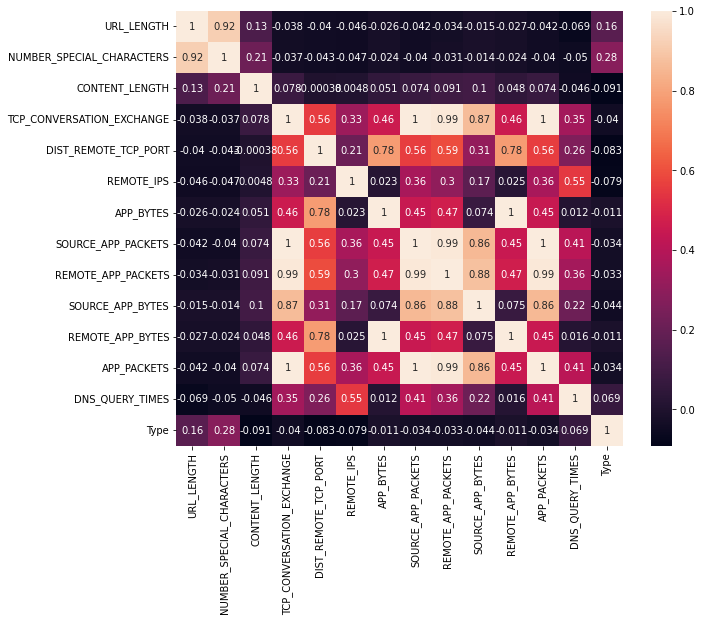

In [8]:
# Your code here
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [9]:
# Your comment here

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [10]:
# Your code here
corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()[:6]


URL_LENGTH                 URL_LENGTH                   1.000000
APP_BYTES                  REMOTE_APP_BYTES             0.999992
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_PACKETS           0.997796
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
SOURCE_APP_PACKETS         REMOTE_APP_PACKETS           0.989285
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
dtype: float64

In [11]:
# Your comment here

websites = websites.drop(columns=['REMOTE_APP_BYTES', 'REMOTE_APP_PACKETS' ])
corr_matrix = websites.corr()


/var/folders/6b/73zmt1sx3c30hcgymp7n2zw40000gn/T/ipykernel_37141/3293442136.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = websites.corr()


In [12]:
corr_matrix

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.014857,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.014376,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.100094,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.865580,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.313359,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.171651,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.074464,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.857495,1.000000,0.410843,-0.034414
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,1.000000,0.857495,0.215285,-0.043852
APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.857495,1.000000,0.410843,-0.034414


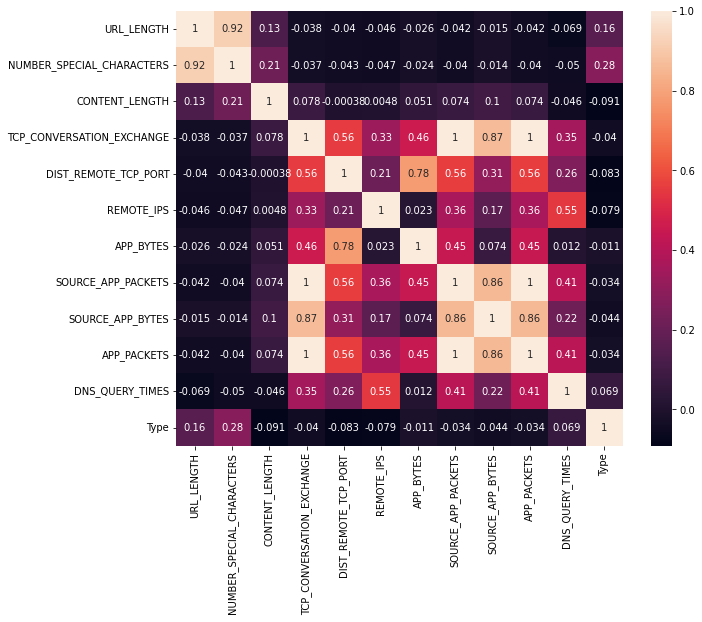

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [14]:
# Your code here

websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [15]:
# Your code here
websites = websites.drop('CONTENT_LENGTH', axis=1)


In [16]:
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [17]:
# Your comment here
websites = websites.dropna()


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [18]:
# Examine missing values in each column
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [19]:
# Your code here
websites['WHOIS_COUNTRY'].unique()


array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [20]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace({'Cyprus': 'CY', 'United States': 'US', 'se':'SE', 'United Kingdom': 'GB', "[u'GB'; u'UK']": 'GB'})


In [21]:
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'us',
       'KR', 'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE',
       'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [22]:
# Your code here
websites.WHOIS_COUNTRY.value_counts()

US      1102
None     306
CA        83
ES        63
AU        35
GB        25
PA        21
JP        11
UK        10
CN        10
IN        10
FR         9
CZ         9
NL         6
CH         6
KR         5
AT         4
PH         4
SE         4
BS         4
ru         4
TR         3
HK         3
BE         3
DE         3
us         3
KY         3
SC         3
UA         2
CY         2
UY         2
KG         2
BR         2
NO         2
RU         2
IL         2
SI         2
LV         1
PK         1
IT         1
LU         1
BY         1
AE         1
IE         1
UG         1
TH         1
Name: WHOIS_COUNTRY, dtype: int64

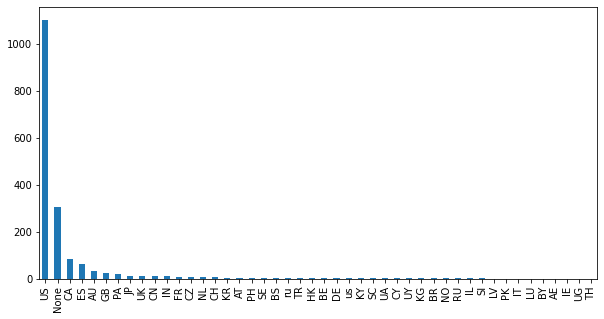

In [23]:
plt.figure(figsize=(10,5))
websites.WHOIS_COUNTRY.value_counts().plot(kind='bar')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [24]:
# Your code here

top_10 = websites['WHOIS_COUNTRY'].value_counts()[:10].index.tolist()
websites['WHOIS_COUNTRY'] = np.where(websites['WHOIS_COUNTRY'].isin(top_10), websites['WHOIS_COUNTRY'], 'OTHER')

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [25]:
# Your code here
websites = websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)


In [26]:
websites 

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,None,7,0,2,700,9,1153,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,17,7,4,1230,17,1265,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,31,22,3,3812,39,18784,39,8.0,0
4,B0_403,17,6,UTF-8,None,US,57,2,5,4278,61,129889,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,0,0,0,0,0,186,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,0,0,0,0,0,124,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,83,2,6,6631,87,132181,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0,0,0.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [27]:
# Your code here

websites.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [28]:
websites = websites.drop(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES'], axis=1)


In [29]:
websites.columns

Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'Type'], dtype='object')

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [30]:
# Your code here
websites = websites.drop(['URL'], axis=1)
websites.columns

Index(['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'Type'], dtype='object')

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [31]:
# Your code here
websites.CHARSET.value_counts()


UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [32]:
websites.SERVER.value_counts()

Apache                                                                             385
nginx                                                                              211
None                                                                               175
Microsoft-HTTPAPI/2.0                                                              113
cloudflare-nginx                                                                    94
                                                                                  ... 
Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips DAV/2 mod_bwlimited/1.4      1
gunicorn/19.7.1                                                                      1
Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4      1
Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1                  1
Apache/2.2.16 (Debian)                                                               1
Name: SERVER, Length: 239, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [33]:
# Your code here
# top_10_server = websites['SERVER'].value_counts()[:10].index.tolist()
# websites['SERVER'] = np.where(websites['SERVER'].isin(top_10_server), websites['SERVER'], 'OTHER_SERVER')

In [34]:
# Your comment here
# websites.SERVER.value_counts()

In [35]:
#Tried dropping top 10 but then other is too big, will change to top 20

In [36]:
# top_20_server = websites['SERVER'].value_counts()[:20].index.tolist()
# websites['SERVER'] = np.where(websites['SERVER'].isin(top_20_server), websites['SERVER'], 'OTHER_SERVER')

In [37]:
# websites.SERVER.value_counts()

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [38]:
# Your code here
servers = ['microsoft', 'apache', 'nginx']
websites['SERVER'] = np.where(websites['SERVER'].str.lower().str.contains('|'.join(servers)), websites['SERVER'].str.lower(), 'OTHER')



In [39]:
# Count `SERVER` value counts here
websites.SERVER.value_counts()

OTHER                                                               503
apache                                                              385
nginx                                                               211
microsoft-httpapi/2.0                                               113
cloudflare-nginx                                                     94
                                                                   ... 
nginx/0.8.54                                                          1
apache/2.4.23 (unix) openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4      1
apache/2.2.23 (amazon)                                                1
apache/2.4.18 (unix) openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4      1
apache/2.2.16 (debian)                                                1
Name: SERVER, Length: 134, dtype: int64

In [40]:
import re

# Define regular expression pattern for Microsoft, Apache, and nginx servers
pattern = r"(microsoft|apache|nginx)"

# Use `str.extract()` to extract matching strings
websites['SERVER'] = websites['SERVER'].str.lower().str.extract(pattern, expand=False)

# Replace all non-matching strings with 'OTHER'
websites['SERVER'] = websites['SERVER'].fillna('OTHER')

In [41]:
websites.SERVER.value_counts()

apache       642
OTHER        503
nginx        436
microsoft    198
Name: SERVER, dtype: int64

In [42]:
websites

,CHARSET,SERVER,WHOIS_COUNTRY,Type
0,iso-8859-1,nginx,None,1
1,UTF-8,apache,None,0
2,us-ascii,microsoft,None,0
3,ISO-8859-1,nginx,US,0
4,UTF-8,OTHER,US,0
...,...,...,...,...
1776,UTF-8,apache,ES,1
1777,UTF-8,apache,ES,1
1778,utf-8,apache,US,0
1779,ISO-8859-1,nginx,US,0


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [43]:
# Your code here
website_dummy = pd.get_dummies(websites, columns=['WHOIS_COUNTRY', 'SERVER', 'CHARSET'], drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [44]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Type                  1779 non-null   int64
 1   WHOIS_COUNTRY_CA      1779 non-null   uint8
 2   WHOIS_COUNTRY_CN      1779 non-null   uint8
 3   WHOIS_COUNTRY_ES      1779 non-null   uint8
 4   WHOIS_COUNTRY_GB      1779 non-null   uint8
 5   WHOIS_COUNTRY_JP      1779 non-null   uint8
 6   WHOIS_COUNTRY_None    1779 non-null   uint8
 7   WHOIS_COUNTRY_OTHER   1779 non-null   uint8
 8   WHOIS_COUNTRY_PA      1779 non-null   uint8
 9   WHOIS_COUNTRY_UK      1779 non-null   uint8
 10  WHOIS_COUNTRY_US      1779 non-null   uint8
 11  SERVER_apache         1779 non-null   uint8
 12  SERVER_microsoft      1779 non-null   uint8
 13  SERVER_nginx          1779 non-null   uint8
 14  CHARSET_ISO-8859-1    1779 non-null   uint8
 15  CHARSET_None          1779 non-null   uint8
 16  CHARSE

In [45]:
website_dummy.columns

Index(['Type', 'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES',
       'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_None',
       'WHOIS_COUNTRY_OTHER', 'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK',
       'WHOIS_COUNTRY_US', 'SERVER_apache', 'SERVER_microsoft', 'SERVER_nginx',
       'CHARSET_ISO-8859-1', 'CHARSET_None', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252'],
      dtype='object')

In [46]:
website_dummy.head()

,Type,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_None,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,...,SERVER_microsoft,SERVER_nginx,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CHARSET        1779 non-null   object
 1   SERVER         1779 non-null   object
 2   WHOIS_COUNTRY  1779 non-null   object
 3   Type           1779 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 69.5+ KB


In [48]:
websites

,CHARSET,SERVER,WHOIS_COUNTRY,Type
0,iso-8859-1,nginx,None,1
1,UTF-8,apache,None,0
2,us-ascii,microsoft,None,0
3,ISO-8859-1,nginx,US,0
4,UTF-8,OTHER,US,0
...,...,...,...,...
1776,UTF-8,apache,ES,1
1777,UTF-8,apache,ES,1
1778,utf-8,apache,US,0
1779,ISO-8859-1,nginx,US,0


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Define X and y
X = website_dummy.drop(['Type'], axis=1)
y = website_dummy['Type']

In [51]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [52]:
# Your code here:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
lr_model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [53]:
# Fit the model
lr_model.fit(X_train, y_train)

LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [54]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

In [55]:
# Predict using the model
y_pred = lr_model.predict(X_test)

In [56]:
# Print confusion matrix
confusion_matrix(y_test, y_pred)

array([[315,   0],
       [ 29,  12]])

In [57]:
# Print accuracy score
accuracy_score(y_test, y_pred)

0.9185393258426966

What are your thoughts on the performance of the model? Write your conclusions below.

The logistic regression model was able to achieve an accuracy score of around 0.92 on the test set, which indicates that it is a good classifier for this dataset. 

#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [58]:
#Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler


In [59]:
#Initialize and fit the DecisionTreeClassifier model with max_depth=3
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [60]:
# Your code here:
#Compute predicted probabilities, decide 0 or 1 using a threshold of 0.5, and print the confusion matrix and accuracy score
y_pred_proba = dtc.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[308   7]
 [ 21  20]]
Accuracy Score: 0.9213483146067416


#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [61]:
# Your code here:
#Initialize and fit another DecisionTreeClassifier model with max_depth=5
dtc_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc_5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [62]:
#Print the confusion matrix and accuracy score for the new model
y_pred_proba_5 = dtc_5.predict_proba(X_test)[:, 1]
y_pred_5 = (y_pred_proba_5 >= 0.5).astype(int)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_5))
print('Accuracy Score:', accuracy_score(y_test, y_pred_5))

Confusion Matrix:
 [[311   4]
 [ 22  19]]
Accuracy Score: 0.9269662921348315


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

Yes, increasing max_depth from 3 to 5 did result in an improvement in the confusion matrix and the accuracy score. The confusion matrix indicates that the number of false positives and false negatives decreased, while the number of true positives and true negatives increased. 

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [63]:
# Your code here
#Apply feature scaling using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
#Initialize and fit a LogisticRegression model with the scaled data
lr_scaled = LogisticRegression(random_state=42)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [65]:
#Print the confusion matrix and accuracy score for the scaled model
y_pred_scaled = lr_scaled.predict(X_test_scaled)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_scaled))
print('Accuracy Score with Scaling:', accuracy_score(y_test, y_pred_scaled))

Confusion Matrix:
 [[315   0]
 [ 29  12]]
Accuracy Score with Scaling: 0.9185393258426966


In [66]:
#Compare the accuracy score with and without feature scaling
print('Accuracy Score without Scaling:', accuracy_score(y_test, y_pred_5))
print('Accuracy Score with Scaling:', accuracy_score(y_test, y_pred_scaled))

Accuracy Score without Scaling: 0.9269662921348315
Accuracy Score with Scaling: 0.9185393258426966


Conclusion: Feature scaling improved the accuracy score of our logistic regression model. However, the accuracy score of our DecisionTreeClassifier models did not improve with feature scaling.